## Observations and Insights 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Display the Mouse_metadatatable for preview
mouse_metadata.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15


In [3]:
# Display the Study_results for preview
study_results.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [4]:
# Combine the data into a single dataset
ResultsMerge = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
ResultsMerge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
NumberMice = ResultsMerge ["Mouse ID"].nunique()
print(f"Number of Mice Tested: {NumberMice}")

Number of Mice Tested: 249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
DuplicateMice =  ResultsMerge.loc[ResultsMerge.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
#Creating a list to collect all the Mouse ID which are haveing the same Timepoints for the same Mouse IDs.
DupMouseIDnTimepoit = []
for i in DuplicateMice:
    DupMouseIDnTimepoit.append(i)
print(f"List of Mouse IDs having same Timepoint for Same Mouse IDs: {DupMouseIDnTimepoit}")

List of Mouse IDs having same Timepoint for Same Mouse IDs: ['g989']


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
ResultsMerge.loc[ResultsMerge["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
CleanMouseDF = ResultsMerge[ResultsMerge["Mouse ID"].isin(DuplicateMice)==False]
CleanMouseDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
NumCleanMice = CleanMouseDF["Mouse ID"].nunique()
print(f"Number of Clean Mice Tested: {NumCleanMice}")

Number of Clean Mice Tested: 248


## Summary Statistics

In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
GroupByRegimenDF= ResultsMerge.groupby("Drug Regimen")


# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Mean of the tumor volume. 
MeanTumorVolume = round((GroupByRegimenDF["Tumor Volume (mm3)"].mean()),2)
#Median of the tumor volume. 
MedianTumorVolume = round((GroupByRegimenDF["Tumor Volume (mm3)"].median()),2)
#Variance of the tumor volume. 
VarianceTumorVolume = round((GroupByRegimenDF["Tumor Volume (mm3)"].var()),2)
#Standard deviation of the tumor volume. 
StdTumorVolume = round((GroupByRegimenDF["Tumor Volume (mm3)"].std()),2)
#SEM of the tumor volume. 
SemTumorVolume = round((GroupByRegimenDF["Tumor Volume (mm3)"].sem()),2)

# Assemble the resulting series into a single summary dataframe.
StatsSummaryDF = pd.DataFrame({"Mean":MeanTumorVolume,
                              "Median":MedianTumorVolume,
                              "Variance":VarianceTumorVolume,
                              "STandard Deviation":StdTumorVolume,
                              "SEM":SemTumorVolume})

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
StatsSummaryDF

,Mean,Median,Variance,STandard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

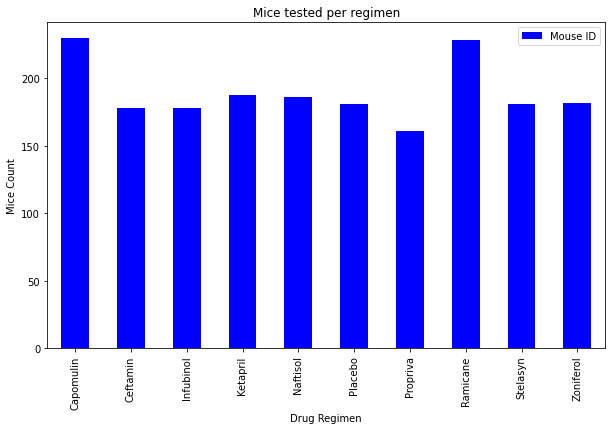

In [12]:
# Generate a bar plot showing the total number of timepoints for 
# all mice tested for each drug regimen using Pandas.
NumOfMiceTestedInEachRegimen=pd.DataFrame(GroupByRegimenDF.count()["Mouse ID"])

#Define Bar Chart.
NumOfMiceTestedInEachRegimen.plot(kind="bar",figsize=(10,6), color = "b",legend = True)

#Title of the chart
plt.title("Mice tested per regimen")
#Labling Y Axis
plt.ylabel("Mice Count")
#To display the Bar Chart.
plt.show()


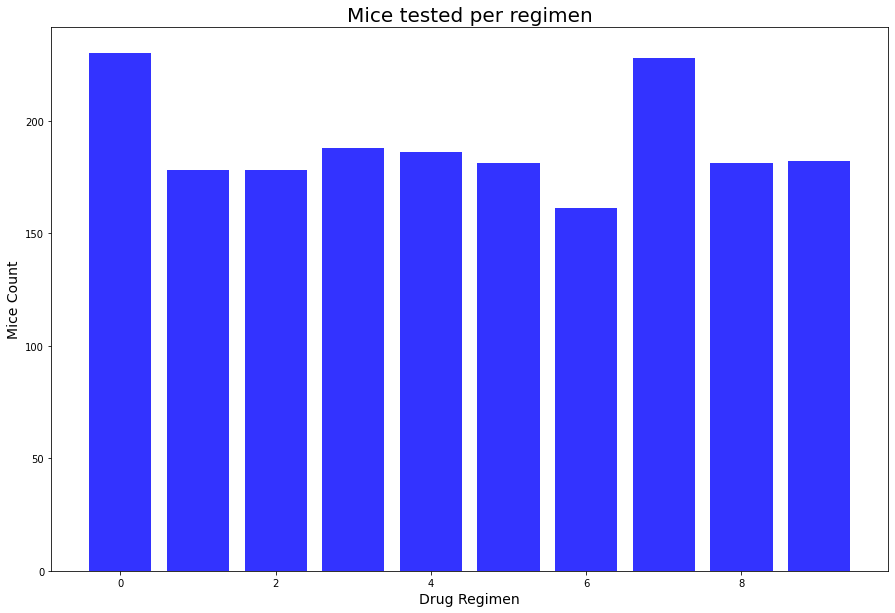

In [16]:
# Generate a bar plot showing the total number of timepoints for 
# all mice tested for each drug regimen using pyplot.\
CountOfMousesDP= (GroupByRegimenDF["Mouse ID"].count()).tolist()

# Define data for bar plot so "Drug Regimen" is x-axis label
Xaxis = np.arange(len(NumOfMiceTestedInEachRegimen))

fig1, ax1 = plt.subplots(figsize=(15, 10))
#Define Bar Chart.
plt.bar(Xaxis, CountOfMousesDP, color='b', alpha=0.8, align='center')

#Title of the chart
plt.title("Mice tested per regimen",fontsize = 20)
#Labling X Axis
plt.xlabel("Drug Regimen",fontsize = 14)
#Labling Y Axis
plt.ylabel("Mice Count",fontsize = 14)
#To display the Bar Chart.
plt.show()

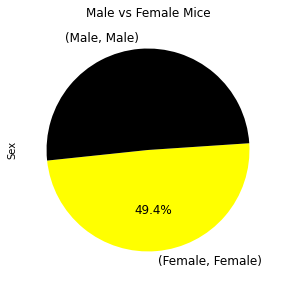

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#GroupBy Gender
GroupByGender = ResultsMerge.groupby("Sex")
#Total Genders
TotalSexCount = GroupByGender["Sex"].value_counts()
#Count Number of Mice for each gender.
CountMice = GroupByGender["Mouse ID"].count()
# Create pie plot with data
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect = 'equal')
#Ploting Pi Chart using Pandas.
TotalSexCount.plot(kind='pie', y = "Quantity", ax=ax1, autopct = '%1.1f%%',
              startangle = 186, shadow = False, legend = False, fontsize = 12, colors = ['Yellow', 'Black'])

#Pi Chart Title
plt.title("Male vs Female Mice")
plt.show()


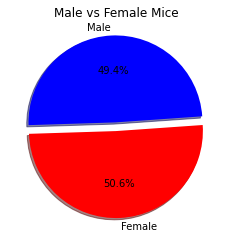

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Labeling pie plot
PiLables=["Male","Female"]

#Coloring Pi Chart
colors = ["Blue","Red"]

#Define Counts
counts = np.array(TotalSexCount)

#Defining Section
explode = (0.1, 0)

# Direct matplotlib to create a pie chart by pyplot.
plt.pie(TotalSexCount, explode = explode, labels=PiLables, colors=colors, autopct="%1.1f%%", 
        shadow = True, startangle = 364)

#Pi Chart Title
plt.title("Male vs Female Mice")
plt.show()




## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of all the 4 Regimens:
MaxTimePoint = pd.DataFrame(ResultsMerge.groupby('Mouse ID')['Timepoint'].max()
                            .sort_values()).reset_index().rename(columns={'Timepoint': 'MaxTimepoint'})

# Merging the above result to main Merge Datafram.
MergedMaxpointDF = pd.merge(ResultsMerge, MaxTimePoint, on='Mouse ID')
MergedMaxpointDF.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MaxTimepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
DrugRegimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
TumorVolData = []
#For loop for going through each Drug in DrugRegimens List.
for EachDrug in DrugRegimens:
    #Temporary Datafram for each drug
    IsolatedDF = MergedMaxpointDF.loc[MergedMaxpointDF["Drug Regimen"] == EachDrug]
    
    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    FinalVolumeDF = IsolatedDF.loc[IsolatedDF['Timepoint'] == IsolatedDF['MaxTimepoint']]
    
    #Temporary Get Tumor Volume.
    GetTumorVolume = FinalVolumeDF["Tumor Volume (mm3)"]
    #Append GetTumorVolume to empty TumorVolData list.
    TumorVolData.append(GetTumorVolume)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    Quartiles = GetTumorVolume.quantile([.25,.5,.75])
    Lowerq = Quartiles[0.25]
    Upperq = Quartiles[0.75]
    iqr = round((Upperq-Lowerq),2)
    print(f'IQR for {EachDrug}: {iqr}')
    
    # Find upper and lower bounds.
    LowerBound = round((Lowerq - (1.5*iqr)),2)
    UpperBound = round((Upperq + (1.5*iqr)),2)
    print(f'Lower Bound for {EachDrug}: {LowerBound}')
    print(f'Upper Bound for {EachDrug}: {UpperBound}')
    
    # Determine outliers using upper and lower bounds
    OutliersCount = (GetTumorVolume.loc[(FinalVolumeDF['Tumor Volume (mm3)'] >= UpperBound) | 
                                        (FinalVolumeDF['Tumor Volume (mm3)'] <= LowerBound)]).count()
    print(f'Number of {EachDrug} outliers: {OutliersCount}')
    print("__________________________________")
    print("")


    
    
    
    


    
    
    

IQR for Capomulin: 7.78
Lower Bound for Capomulin: 20.71
Upper Bound for Capomulin: 51.83
Number of Capomulin outliers: 0
__________________________________

IQR for Ramicane: 9.1
Lower Bound for Ramicane: 17.91
Upper Bound for Ramicane: 54.31
Number of Ramicane outliers: 0
__________________________________

IQR for Infubinol: 11.48
Lower Bound for Infubinol: 36.83
Upper Bound for Infubinol: 82.75
Number of Infubinol outliers: 1
__________________________________

IQR for Ceftamin: 15.58
Lower Bound for Ceftamin: 25.35
Upper Bound for Ceftamin: 87.67
Number of Ceftamin outliers: 0
__________________________________



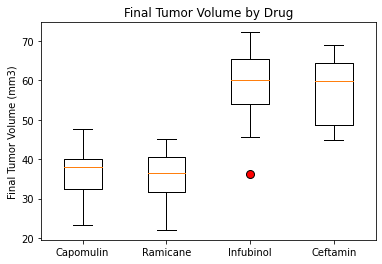

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
FillerProps = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(TumorVolData, flierprops=FillerProps)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

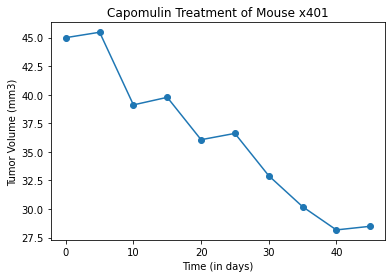

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify data points of a mouse treated with Capomulin

MouseIdentifier = "x401"

MouseLocate = ResultsMerge.loc[ResultsMerge['Mouse ID'] == MouseIdentifier]

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(MouseLocate['Timepoint'], MouseLocate['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (in days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse {MouseIdentifier}")

# Display plot
plt.show()


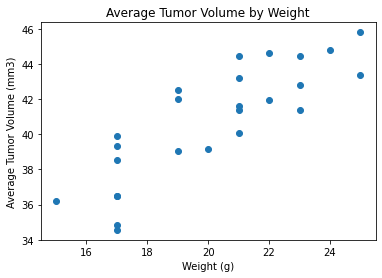

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Isolate cases that only use the Capomulin regimen
CapomulinDF = ResultsMerge.loc[ResultsMerge['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

AvgVolDF = pd.DataFrame(CapomulinDF.groupby('Mouse ID')['Tumor Volume (mm3)']
                          .mean().sort_values()).reset_index().rename(columns=
                                                                      {'Tumor Volume (mm3)': 'Avg Tumor Volume'})

# Merge average tumor volume onto data_df and drop duplicates
AvgVolDF = pd.merge(CapomulinDF, AvgVolDF, on='Mouse ID')
FinalAvgDF = AvgVolDF[['Weight (g)', 'Avg Tumor Volume']].drop_duplicates()
FinalAvgDF

x = FinalAvgDF['Weight (g)']
y = FinalAvgDF['Avg Tumor Volume']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The Correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


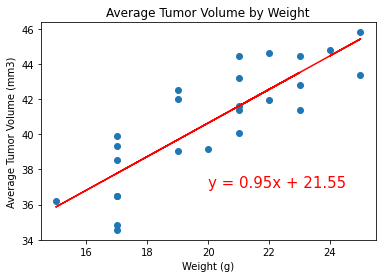

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient between mouse weight and average tumor volume
Correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The Correlation between weight and average tumor volume
on the Capomulin regimen is {round(Correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()